In [1]:
%pylab inline
import pandas as pd
import os
import scipy.stats

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Paths
DATADIR="/storage/mgymrek/chipmunk/fig2_power"
OUTDIR=os.path.join(DATADIR, "pdfs")

FIG2COLOR = "darkblue"

Populating the interactive namespace from numpy and matplotlib


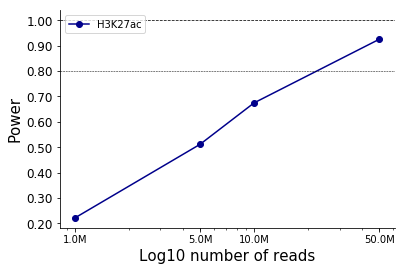

In [12]:
factors = ["GM12878_H3K27ac_ENCFF097SQI_ENCFF465WTH"]

fcolors = {
    "GM12878_H3K27ac_ENCFF097SQI_ENCFF465WTH": "darkblue",
}

fig = plt.figure()
ax = fig.add_subplot(111)
for factor in factors:
    data = pd.read_csv(os.path.join(DATADIR, "%s.power.tab"%factor),
                   sep=" ", names=["factor","numreads","numpeaks","total"])
    data["power"] = data["numpeaks"]*1.0/data["total"]
    data = data[data["power"]!=0] # TODO remove after all done
    ax.plot((data["numreads"]), data["power"], marker="o", color=fcolors[factor], label=factor.split("_")[1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.axhline(y=1.00, linestyle="dashed", color="black", linewidth=0.75)
ax.axhline(y=0.8, linestyle="dashed", color="black", linewidth=0.5)

ax.set_xscale('log');
ax.set_xticks(list(set(data["numreads"])))
ax.set_xticklabels(["%sM"%(item/1000000) for item in list(set(data["numreads"]))])
ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12)
ax.set_xlabel("Log10 number of reads", size=15)
ax.set_ylabel("Power", size=15);
ax.legend(loc="upper left");